# Regressão
Um dos métodos mais usados em estatística para estimar valores ou classes.

1. [Regressão Linear](#Regress%C3%A3o-Linear)
2. [Regressão Linear com Tensorflow](#Regressão-linear-no-Tensorflow)
3. [Regressão Logística](#Regressão-Logística)
4. [Regressão Logística com Tensorflow](#Regressão-Logística-com-Tensorflow)

# Regressão Linear
A regressão linear consiste na aproximação de um modelo linear, utilizando os dados para criar uma reta, relacionando o valor das variáveis com um valor objetivo (variável Y, ou variável dependente). A regressão pode contar com um ou mais varáveis independentes, conhecido como regressão linear múltipla.

A equação do modelo linear simples é:

$$Y = a X + b $$

Sendo Y a variável de interesse e X a variável independente. ```a``` é o coeficiente angular ('slope' ou 'gradient'), indicando a tangente entre a reta e o eixo x. ```b``` é o coeficiente linear ('intercept') e indica o ponto que intercepta o eixo y quando x = 0.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Definimos variáveis independentes (valores entre 0 e 5 com passo de 0,1).

In [3]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

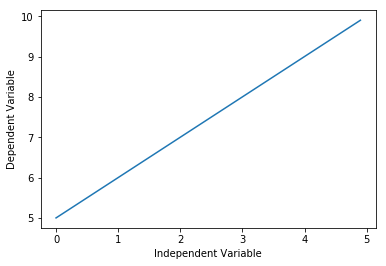

In [4]:
a = 1
b = 5

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<hr>

# Regressão linear no Tensorflow
Para observar a aplicação de regressão linear com Tensorflow, uso um [dataset](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) que correlaciona consumo de combustível com emissão de dióxido de carbono.

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2018-12-22 23:45:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   140KB/s    in 0,5s    

2018-12-22 23:45:02 (140 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [59]:
df = pd.read_csv("datasets/FuelConsumption.csv")

df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


No dataset vemos que existem os seguintes dados:
- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

Para predizer o consumo à partir do tamanho do carro, utilizamos a seguinte sintaxe:

In [7]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

A variável independente, no caso, é ```CO2EMISSIONS``` e a variável independente é ```ENGINESIZE```. Com essas duas colunas do dataframe, podemos criar um modelo de regressão linear e obter algumas estimativas.

Inicialmente, definimos ```a``` e ```b``` (da fórmula da regressão linear) como valores arbitrários.

In [8]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

## Loss function
Para conseguir fazer estimativas, devemos minimizar o erro quadrado (pra mais e pra menos), assim os dados estimados se aproximam mais dos dados reais que temos à disposição. Definimos essa como a função a ser minimizada. Para isso, usa-se a função ```tf.reduce_mean()```:

In [9]:
loss = tf.reduce_mean(tf.square(y - train_y))

## Otimização (gradient descent)
Para otimizar esse problema, vamos usar o método do [gradiente descendente](https://en.wikipedia.org/wiki/Gradient_descent). Ele executa derivadas da função buscada para obter mínimos. Por vezes, podemos encontrar mínimos locais, o que não é o valor ótimo, se esse mínimo local não for um mínimo global. O parâmetro passado indica a taxa de aprendizagem e indica a velocidade com que cada ponto da derivada é testado. Quanto menor o valor, mais demorado será o processo, porém a chance de encontrar um mínimo é maior.

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

Para minimizar a função 'loss', utilizamos a função ```minimize()```.

In [16]:
train = optimizer.minimize(loss)

Devemos então definir as variáveis antes de executar o grafo.

In [17]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Inicio a sessão e a cada 5 passos, printo o valor da função 'loss', de ```a``` e de ```b```.

In [18]:
loss_values = []
train_data = []
for step in range(1000):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.594 31.414211 33.382053
5 2922.954 54.816692 40.65341
10 2007.6387 59.065193 42.998283
15 1946.111 59.64082 44.38414
20 1916.8186 59.51489 45.572674
25 1889.4736 59.257656 46.710266
30 1862.939 58.978527 47.825195
35 1837.153 58.698444 48.92307
40 1812.0923 58.42139 50.005154
45 1787.7363 58.148083 51.07186
50 1764.0656 57.87861 52.12345
55 1741.061 57.612946 53.16014
60 1718.7034 57.351044 54.182144
65 1696.975 57.092854 55.189667
70 1675.8575 56.838318 56.18292
75 1655.3341 56.587395 57.162106
80 1635.3883 56.340023 58.127415
85 1616.0035 56.096153 59.079052
90 1597.164 55.85574 60.017212
95 1578.8541 55.618732 60.942078
100 1561.0602 55.385082 61.85384
105 1543.7661 55.15474 62.75269
110 1526.959 54.927666 63.6388
115 1510.6245 54.703804 64.51236
120 1494.7495 54.483116 65.37355
125 1479.321 54.265553 66.222534
130 1464.3267 54.05107 67.059494
135 1449.7544 53.83963 67.88459
140 1435.5918 53.631184 68.698006
145 1421.8275 53.42569 69.49989
150 1408.4509 53.223106 70.29042
15

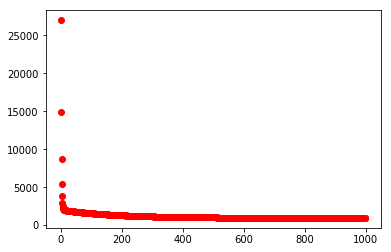

In [19]:
plt.plot(loss_values, 'ro')

Observamos aqui que o valor da função 'loss' ainda decrescia bastante, até estabilizar em torno da iteração de número 500, chegando próximo de um possível mínimo global (ou local, não dá pra saber).

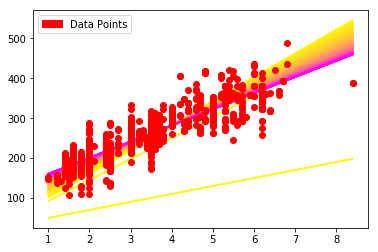

In [40]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

# Regressão Logística
Enquanto usamos a regressão linear para estimar valores contínuos, a regressão logística tem um uso mais direcionado para classificar pontos em um dataset, obtendo a classe à qual esse ponto tem mais chance de pertencer.

Da regressão linear:
$$
y = w0 + w1 \times x1 + w2 \times x2 + \cdots
$$
e:
$$
Y = W X + b
$$

Chegamos a:
$$
P(ŷ = Y) = \theta(y) = \frac{e^y}{1 + e^y} = \frac{1}{1+e^{-y}} = p 
$$

Assim obtendo um p-valor entre 0 e 1 para cada ponto.

A equação acima produz uma [curva em forma de "s"](http://en.wikipedia.org/wiki/Logistic_function), que divide o espaço em duas classes.
![title](img/logistic.png)

# Regressão Logística com Tensorflow

In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Para esse caso, vamos usar o clássico Iris Dataset.

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

O dataset foi criado pelo biólogo e estatístico Ronald Fisher e consiste de 50 exemplos de cada espécie de Iris (Iris setosa, Iris virginica e Iris versicolor). Cada flor contém 5 atributos: comprimento e largura da pétala, comprimento e largura da sépala e sua espécie(variável de interesse).

## Placeholders
Para que o nosso algoritmo aceite dados sem saber o tamanho do vetor ou a quantidade de dados que alimentamos o nosso grafo. Para isso, informamos o número de features e de labels de interesse que temos. Assim, o Tensor pode receber dados em grupos de variados tamanhos, já que os placeholders consistem de vetores vazios.

In [23]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

## Pesos e viés
Assim como na regressão linear, devemos definir alguns valores iniciais, para poder então encontrar os valores ótimos para chegar na melhor estimativa.

Vamos inicializar ```W``` e ```b``` como tensores nulos, para então aprendê-los com os dados presentes no dataset. Ao final do treinamento podemos salvar esses valores e utilizá-los depois para fazer novas estimativas.

In [24]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

Vemos o Tensor ```W``` como um vetor de 3 dimensões, que conta com um input de 4 dimensões e 3 classes possíveis. Já ```b``` conta com 2 dimensões, indicando a saída de uma das 3 classes. Os pesos devem ter um valor inicial, no caso, escolhemos Tensores com seus valores zerados. Na próxima célula, valores aleatórios da distribuição normal são definidos para cada Tensor.

In [25]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

## Modelo
A regressão logística é definida pela seguinte equação:

$$
ŷ =sigmoid(WX+b)
$$

No Tensorflow, ela pode ser definida como:

In [26]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

A função aqui usada será a logística $(\frac{1}{1+e^{-Wx}})$, que recebe os dados do dataset, após a aplicação dos pesos e do viés. Essa função é aplicada por meio do método ```nn.sigmoid```. Essa função insere os pesos junto ao viés à entrada e aplica a uma curva de 0 a 100 por cento, chegando à função de probabilidade de nosso interesse.
<hr>

## Treinamento
Queremos encontrar o modelo que apresente os melhores pesos (**w**).

Para isso, devemos minimizar o erro/custo da função. No caso, será utilizado a função de erro '[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)' (erro quadrático médio).

Para minimizar a função de custo, vamos aplicar novamente o [gradiente descendente](https://en.wikipedia.org/wiki/Gradient_descent).

Para esse treinamento, define-se a taxa de aprendizagem e o número de iterações.

In [53]:
# Number of Epochs in our training
numEpochs = 100000

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [54]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

Para iniciar o processamento, devemos iniciar uma Sessão e executar as operações.

In [55]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

Os seguintes comandos têm como função analisar a eficiencia do modelo ao longo do treinamento:

In [56]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

Finalmente posso iniciar o treinamento.

In [57]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.353535, cost 34.6055, change in cost 34.6055
step 10, training accuracy 0.606061, cost 30.0186, change in cost 4.58697
step 20, training accuracy 0.646465, cost 28.0836, change in cost 1.93498
step 30, training accuracy 0.646465, cost 26.4563, change in cost 1.62728
step 40, training accuracy 0.646465, cost 25.1063, change in cost 1.35002
step 50, training accuracy 0.646465, cost 23.9912, change in cost 1.11505
step 60, training accuracy 0.646465, cost 23.0678, change in cost 0.923435
step 70, training accuracy 0.646465, cost 22.2978, change in cost 0.769979
step 80, training accuracy 0.646465, cost 21.65, change in cost 0.647812
step 90, training accuracy 0.646465, cost 21.0996, change in cost 0.55044
step 100, training accuracy 0.656566, cost 20.6271, change in cost 0.472435
step 110, training accuracy 0.666667, cost 20.2176, change in cost 0.409479
step 120, training accuracy 0.666667, cost 19.8594, change in cost 0.35825
step 130, training accuracy 0.666

step 1540, training accuracy 0.939394, cost 13.1753, change in cost 0.012886
step 1550, training accuracy 0.939394, cost 13.1625, change in cost 0.0127764
step 1560, training accuracy 0.939394, cost 13.1498, change in cost 0.0126705
step 1570, training accuracy 0.939394, cost 13.1372, change in cost 0.0125656
step 1580, training accuracy 0.939394, cost 13.1248, change in cost 0.0124636
step 1590, training accuracy 0.939394, cost 13.1124, change in cost 0.0123606
step 1600, training accuracy 0.939394, cost 13.1002, change in cost 0.0122595
step 1610, training accuracy 0.949495, cost 13.088, change in cost 0.0121603
step 1620, training accuracy 0.949495, cost 13.0759, change in cost 0.012063
step 1630, training accuracy 0.949495, cost 13.064, change in cost 0.0119658
step 1640, training accuracy 0.949495, cost 13.0521, change in cost 0.0118694
step 1650, training accuracy 0.949495, cost 13.0403, change in cost 0.0117731
step 1660, training accuracy 0.949495, cost 13.0286, change in cost 

step 3140, training accuracy 0.959596, cost 11.9356, change in cost 0.00474167
step 3150, training accuracy 0.959596, cost 11.9309, change in cost 0.00471973
step 3160, training accuracy 0.959596, cost 11.9262, change in cost 0.00469685
step 3170, training accuracy 0.959596, cost 11.9216, change in cost 0.004673
step 3180, training accuracy 0.959596, cost 11.9169, change in cost 0.00465393
step 3190, training accuracy 0.959596, cost 11.9123, change in cost 0.00463009
step 3200, training accuracy 0.959596, cost 11.9077, change in cost 0.00461006
step 3210, training accuracy 0.959596, cost 11.9031, change in cost 0.00458717
step 3220, training accuracy 0.959596, cost 11.8985, change in cost 0.00456619
step 3230, training accuracy 0.959596, cost 11.894, change in cost 0.00454426
step 3240, training accuracy 0.959596, cost 11.8894, change in cost 0.00452709
step 3250, training accuracy 0.959596, cost 11.8849, change in cost 0.00450325
step 3260, training accuracy 0.959596, cost 11.8804, ch

step 4770, training accuracy 0.949495, cost 11.3757, change in cost 0.00252342
step 4780, training accuracy 0.949495, cost 11.3731, change in cost 0.00251484
step 4790, training accuracy 0.949495, cost 11.3706, change in cost 0.00250721
step 4800, training accuracy 0.949495, cost 11.3681, change in cost 0.00250053
step 4810, training accuracy 0.949495, cost 11.3656, change in cost 0.002491
step 4820, training accuracy 0.949495, cost 11.3632, change in cost 0.00248528
step 4830, training accuracy 0.949495, cost 11.3607, change in cost 0.00247478
step 4840, training accuracy 0.949495, cost 11.3582, change in cost 0.00246906
step 4850, training accuracy 0.949495, cost 11.3558, change in cost 0.00246143
step 4860, training accuracy 0.949495, cost 11.3533, change in cost 0.0024519
step 4870, training accuracy 0.949495, cost 11.3509, change in cost 0.00244808
step 4880, training accuracy 0.949495, cost 11.3484, change in cost 0.00243759
step 4890, training accuracy 0.949495, cost 11.346, cha

step 6460, training accuracy 0.939394, cost 11.0371, change in cost 0.0016098
step 6470, training accuracy 0.939394, cost 11.0355, change in cost 0.00160503
step 6480, training accuracy 0.939394, cost 11.0339, change in cost 0.00160122
step 6490, training accuracy 0.939394, cost 11.0323, change in cost 0.0015974
step 6500, training accuracy 0.939394, cost 11.0307, change in cost 0.00159264
step 6510, training accuracy 0.939394, cost 11.0291, change in cost 0.00159264
step 6520, training accuracy 0.939394, cost 11.0275, change in cost 0.00158596
step 6530, training accuracy 0.939394, cost 11.0259, change in cost 0.00158405
step 6540, training accuracy 0.939394, cost 11.0243, change in cost 0.00158024
step 6550, training accuracy 0.939394, cost 11.0228, change in cost 0.00157642
step 6560, training accuracy 0.939394, cost 11.0212, change in cost 0.00157261
step 6570, training accuracy 0.939394, cost 11.0196, change in cost 0.00156975
step 6580, training accuracy 0.939394, cost 11.0181, c

step 8090, training accuracy 0.949495, cost 10.8146, change in cost 0.00116634
step 8100, training accuracy 0.949495, cost 10.8134, change in cost 0.0011673
step 8110, training accuracy 0.949495, cost 10.8123, change in cost 0.00116253
step 8120, training accuracy 0.949495, cost 10.8111, change in cost 0.00115967
step 8130, training accuracy 0.949495, cost 10.8099, change in cost 0.00115967
step 8140, training accuracy 0.949495, cost 10.8088, change in cost 0.00115776
step 8150, training accuracy 0.949495, cost 10.8076, change in cost 0.0011549
step 8160, training accuracy 0.949495, cost 10.8065, change in cost 0.00115299
step 8170, training accuracy 0.949495, cost 10.8053, change in cost 0.00115204
step 8180, training accuracy 0.949495, cost 10.8042, change in cost 0.00114822
step 8190, training accuracy 0.949495, cost 10.803, change in cost 0.00114727
step 8200, training accuracy 0.949495, cost 10.8019, change in cost 0.00114536
step 8210, training accuracy 0.949495, cost 10.8007, ch

step 9730, training accuracy 0.949495, cost 10.6464, change in cost 0.000905037
step 9740, training accuracy 0.949495, cost 10.6455, change in cost 0.000905037
step 9750, training accuracy 0.949495, cost 10.6446, change in cost 0.000904083
step 9760, training accuracy 0.949495, cost 10.6437, change in cost 0.000900269
step 9770, training accuracy 0.949495, cost 10.6428, change in cost 0.000901222
step 9780, training accuracy 0.949495, cost 10.6419, change in cost 0.000899315
step 9790, training accuracy 0.949495, cost 10.641, change in cost 0.000899315
step 9800, training accuracy 0.949495, cost 10.6401, change in cost 0.000896454
step 9810, training accuracy 0.949495, cost 10.6392, change in cost 0.0008955
step 9820, training accuracy 0.949495, cost 10.6383, change in cost 0.0008955
step 9830, training accuracy 0.949495, cost 10.6374, change in cost 0.000893593
step 9840, training accuracy 0.949495, cost 10.6365, change in cost 0.000890732
step 9850, training accuracy 0.949495, cost 1

step 11270, training accuracy 0.949495, cost 10.5202, change in cost 0.000745773
step 11280, training accuracy 0.949495, cost 10.5195, change in cost 0.000742912
step 11290, training accuracy 0.949495, cost 10.5187, change in cost 0.000741959
step 11300, training accuracy 0.949495, cost 10.518, change in cost 0.000741959
step 11310, training accuracy 0.949495, cost 10.5172, change in cost 0.000741005
step 11320, training accuracy 0.949495, cost 10.5165, change in cost 0.000739098
step 11330, training accuracy 0.949495, cost 10.5158, change in cost 0.000739098
step 11340, training accuracy 0.949495, cost 10.515, change in cost 0.000739098
step 11350, training accuracy 0.949495, cost 10.5143, change in cost 0.000735283
step 11360, training accuracy 0.949495, cost 10.5135, change in cost 0.00073719
step 11370, training accuracy 0.949495, cost 10.5128, change in cost 0.000734329
step 11380, training accuracy 0.949495, cost 10.5121, change in cost 0.000735283
step 11390, training accuracy 0

step 12690, training accuracy 0.949495, cost 10.4226, change in cost 0.00063324
step 12700, training accuracy 0.949495, cost 10.422, change in cost 0.000638008
step 12710, training accuracy 0.949495, cost 10.4214, change in cost 0.000632286
step 12720, training accuracy 0.949495, cost 10.4207, change in cost 0.000634193
step 12730, training accuracy 0.949495, cost 10.4201, change in cost 0.000636101
step 12740, training accuracy 0.949495, cost 10.4195, change in cost 0.000631332
step 12750, training accuracy 0.949495, cost 10.4188, change in cost 0.000632286
step 12760, training accuracy 0.949495, cost 10.4182, change in cost 0.000631332
step 12770, training accuracy 0.949495, cost 10.4176, change in cost 0.000631332
step 12780, training accuracy 0.949495, cost 10.4169, change in cost 0.000629425
step 12790, training accuracy 0.949495, cost 10.4163, change in cost 0.000630379
step 12800, training accuracy 0.949495, cost 10.4157, change in cost 0.000628471
step 12810, training accuracy 

step 14180, training accuracy 0.949495, cost 10.3346, change in cost 0.000551224
step 14190, training accuracy 0.949495, cost 10.3341, change in cost 0.000548363
step 14200, training accuracy 0.949495, cost 10.3335, change in cost 0.000549316
step 14210, training accuracy 0.949495, cost 10.333, change in cost 0.000548363
step 14220, training accuracy 0.949495, cost 10.3324, change in cost 0.000547409
step 14230, training accuracy 0.949495, cost 10.3319, change in cost 0.000547409
step 14240, training accuracy 0.949495, cost 10.3313, change in cost 0.000546455
step 14250, training accuracy 0.949495, cost 10.3308, change in cost 0.000544548
step 14260, training accuracy 0.949495, cost 10.3302, change in cost 0.000546455
step 14270, training accuracy 0.949495, cost 10.3297, change in cost 0.000546455
step 14280, training accuracy 0.949495, cost 10.3291, change in cost 0.000543594
step 14290, training accuracy 0.949495, cost 10.3286, change in cost 0.000543594
step 14300, training accuracy

step 15590, training accuracy 0.949495, cost 10.2619, change in cost 0.000483513
step 15600, training accuracy 0.949495, cost 10.2614, change in cost 0.00048542
step 15610, training accuracy 0.949495, cost 10.2609, change in cost 0.000484467
step 15620, training accuracy 0.949495, cost 10.2604, change in cost 0.000482559
step 15630, training accuracy 0.949495, cost 10.2599, change in cost 0.000483513
step 15640, training accuracy 0.949495, cost 10.2595, change in cost 0.000483513
step 15650, training accuracy 0.949495, cost 10.259, change in cost 0.000480652
step 15660, training accuracy 0.949495, cost 10.2585, change in cost 0.000481606
step 15670, training accuracy 0.949495, cost 10.258, change in cost 0.000483513
step 15680, training accuracy 0.949495, cost 10.2575, change in cost 0.000481606
step 15690, training accuracy 0.949495, cost 10.257, change in cost 0.000479698
step 15700, training accuracy 0.949495, cost 10.2566, change in cost 0.000480652
step 15710, training accuracy 0.

step 17000, training accuracy 0.959596, cost 10.1974, change in cost 0.000432014
step 17010, training accuracy 0.959596, cost 10.1969, change in cost 0.000432968
step 17020, training accuracy 0.959596, cost 10.1965, change in cost 0.000430107
step 17030, training accuracy 0.959596, cost 10.1961, change in cost 0.000431061
step 17040, training accuracy 0.959596, cost 10.1957, change in cost 0.000430107
step 17050, training accuracy 0.959596, cost 10.1952, change in cost 0.000430107
step 17060, training accuracy 0.959596, cost 10.1948, change in cost 0.000431061
step 17070, training accuracy 0.959596, cost 10.1944, change in cost 0.0004282
step 17080, training accuracy 0.959596, cost 10.1939, change in cost 0.000432014
step 17090, training accuracy 0.959596, cost 10.1935, change in cost 0.000429153
step 17100, training accuracy 0.959596, cost 10.1931, change in cost 0.0004282
step 17110, training accuracy 0.959596, cost 10.1926, change in cost 0.000427246
step 17120, training accuracy 0.

step 18370, training accuracy 0.959596, cost 10.1412, change in cost 0.000388145
step 18380, training accuracy 0.959596, cost 10.1408, change in cost 0.000389099
step 18390, training accuracy 0.959596, cost 10.1405, change in cost 0.000390053
step 18400, training accuracy 0.959596, cost 10.1401, change in cost 0.000387192
step 18410, training accuracy 0.959596, cost 10.1397, change in cost 0.000389099
step 18420, training accuracy 0.959596, cost 10.1393, change in cost 0.000387192
step 18430, training accuracy 0.959596, cost 10.1389, change in cost 0.000387192
step 18440, training accuracy 0.959596, cost 10.1385, change in cost 0.000387192
step 18450, training accuracy 0.959596, cost 10.1381, change in cost 0.000386238
step 18460, training accuracy 0.959596, cost 10.1377, change in cost 0.000385284
step 18470, training accuracy 0.959596, cost 10.1374, change in cost 0.000388145
step 18480, training accuracy 0.959596, cost 10.137, change in cost 0.000386238
step 18490, training accuracy

step 19670, training accuracy 0.959596, cost 10.093, change in cost 0.000354767
step 19680, training accuracy 0.959596, cost 10.0926, change in cost 0.000352859
step 19690, training accuracy 0.959596, cost 10.0923, change in cost 0.000355721
step 19700, training accuracy 0.959596, cost 10.0919, change in cost 0.000353813
step 19710, training accuracy 0.959596, cost 10.0916, change in cost 0.000353813
step 19720, training accuracy 0.959596, cost 10.0912, change in cost 0.000351906
step 19730, training accuracy 0.959596, cost 10.0909, change in cost 0.000353813
step 19740, training accuracy 0.959596, cost 10.0905, change in cost 0.000352859
step 19750, training accuracy 0.959596, cost 10.0901, change in cost 0.000351906
step 19760, training accuracy 0.959596, cost 10.0898, change in cost 0.000349998
step 19770, training accuracy 0.959596, cost 10.0894, change in cost 0.000353813
step 19780, training accuracy 0.959596, cost 10.0891, change in cost 0.000350952
step 19790, training accuracy

step 21240, training accuracy 0.959596, cost 10.0402, change in cost 0.000319481
step 21250, training accuracy 0.959596, cost 10.0399, change in cost 0.000317574
step 21260, training accuracy 0.959596, cost 10.0396, change in cost 0.000318527
step 21270, training accuracy 0.959596, cost 10.0393, change in cost 0.000315666
step 21280, training accuracy 0.959596, cost 10.039, change in cost 0.000319481
step 21290, training accuracy 0.959596, cost 10.0387, change in cost 0.000317574
step 21300, training accuracy 0.959596, cost 10.0383, change in cost 0.000317574
step 21310, training accuracy 0.959596, cost 10.038, change in cost 0.00031662
step 21320, training accuracy 0.959596, cost 10.0377, change in cost 0.000315666
step 21330, training accuracy 0.959596, cost 10.0374, change in cost 0.00031662
step 21340, training accuracy 0.959596, cost 10.0371, change in cost 0.00031662
step 21350, training accuracy 0.959596, cost 10.0368, change in cost 0.000317574
step 21360, training accuracy 0.9

step 22590, training accuracy 0.969697, cost 9.9991, change in cost 0.000289917
step 22600, training accuracy 0.969697, cost 9.9988, change in cost 0.000292778
step 22610, training accuracy 0.969697, cost 9.99851, change in cost 0.000289917
step 22620, training accuracy 0.969697, cost 9.99822, change in cost 0.000292778
step 22630, training accuracy 0.969697, cost 9.99793, change in cost 0.000290871
step 22640, training accuracy 0.969697, cost 9.99764, change in cost 0.000290871
step 22650, training accuracy 0.969697, cost 9.99735, change in cost 0.000289917
step 22660, training accuracy 0.969697, cost 9.99706, change in cost 0.000290871
step 22670, training accuracy 0.969697, cost 9.99677, change in cost 0.000289917
step 22680, training accuracy 0.969697, cost 9.99648, change in cost 0.000290871
step 22690, training accuracy 0.969697, cost 9.99619, change in cost 0.000290871
step 22700, training accuracy 0.969697, cost 9.9959, change in cost 0.000289917
step 22710, training accuracy 0

step 24230, training accuracy 0.969697, cost 9.95359, change in cost 0.000266075
step 24240, training accuracy 0.969697, cost 9.95333, change in cost 0.000264168
step 24250, training accuracy 0.969697, cost 9.95306, change in cost 0.00026226
step 24260, training accuracy 0.969697, cost 9.9528, change in cost 0.000263214
step 24270, training accuracy 0.969697, cost 9.95254, change in cost 0.000263214
step 24280, training accuracy 0.969697, cost 9.95227, change in cost 0.000263214
step 24290, training accuracy 0.969697, cost 9.95201, change in cost 0.00026226
step 24300, training accuracy 0.969697, cost 9.95175, change in cost 0.000264168
step 24310, training accuracy 0.969697, cost 9.95149, change in cost 0.00026226
step 24320, training accuracy 0.969697, cost 9.95122, change in cost 0.000261307
step 24330, training accuracy 0.969697, cost 9.95096, change in cost 0.000264168
step 24340, training accuracy 0.969697, cost 9.9507, change in cost 0.000260353
step 24350, training accuracy 0.9

step 25620, training accuracy 0.969697, cost 9.91839, change in cost 0.000244141
step 25630, training accuracy 0.969697, cost 9.91815, change in cost 0.000243187
step 25640, training accuracy 0.969697, cost 9.91791, change in cost 0.000243187
step 25650, training accuracy 0.969697, cost 9.91766, change in cost 0.000242233
step 25660, training accuracy 0.969697, cost 9.91742, change in cost 0.000243187
step 25670, training accuracy 0.969697, cost 9.91718, change in cost 0.000243187
step 25680, training accuracy 0.969697, cost 9.91694, change in cost 0.00024128
step 25690, training accuracy 0.969697, cost 9.91669, change in cost 0.000243187
step 25700, training accuracy 0.969697, cost 9.91645, change in cost 0.000242233
step 25710, training accuracy 0.969697, cost 9.91621, change in cost 0.00024128
step 25720, training accuracy 0.969697, cost 9.91597, change in cost 0.000242233
step 25730, training accuracy 0.969697, cost 9.91573, change in cost 0.00024128
step 25740, training accuracy 0

step 27030, training accuracy 0.969697, cost 9.88546, change in cost 0.000226021
step 27040, training accuracy 0.969697, cost 9.88524, change in cost 0.000222206
step 27050, training accuracy 0.969697, cost 9.88501, change in cost 0.000224113
step 27060, training accuracy 0.969697, cost 9.88479, change in cost 0.000225067
step 27070, training accuracy 0.969697, cost 9.88456, change in cost 0.000226021
step 27080, training accuracy 0.969697, cost 9.88434, change in cost 0.000222206
step 27090, training accuracy 0.969697, cost 9.88412, change in cost 0.00022316
step 27100, training accuracy 0.969697, cost 9.88389, change in cost 0.00022316
step 27110, training accuracy 0.969697, cost 9.88367, change in cost 0.000224113
step 27120, training accuracy 0.969697, cost 9.88345, change in cost 0.00022316
step 27130, training accuracy 0.969697, cost 9.88322, change in cost 0.000224113
step 27140, training accuracy 0.969697, cost 9.883, change in cost 0.000221252
step 27150, training accuracy 0.9

step 28460, training accuracy 0.969697, cost 9.8546, change in cost 0.000208855
step 28470, training accuracy 0.969697, cost 9.85439, change in cost 0.000207901
step 28480, training accuracy 0.969697, cost 9.85419, change in cost 0.000206947
step 28490, training accuracy 0.969697, cost 9.85398, change in cost 0.000205994
step 28500, training accuracy 0.969697, cost 9.85377, change in cost 0.000206947
step 28510, training accuracy 0.969697, cost 9.85356, change in cost 0.000207901
step 28520, training accuracy 0.969697, cost 9.85336, change in cost 0.000205994
step 28530, training accuracy 0.969697, cost 9.85315, change in cost 0.000205994
step 28540, training accuracy 0.969697, cost 9.85294, change in cost 0.000208855
step 28550, training accuracy 0.969697, cost 9.85274, change in cost 0.00020504
step 28560, training accuracy 0.969697, cost 9.85253, change in cost 0.000206947
step 28570, training accuracy 0.969697, cost 9.85232, change in cost 0.000206947
step 28580, training accuracy 

step 30020, training accuracy 0.969697, cost 9.82353, change in cost 0.000191689
step 30030, training accuracy 0.969697, cost 9.82335, change in cost 0.000188828
step 30040, training accuracy 0.969697, cost 9.82315, change in cost 0.000192642
step 30050, training accuracy 0.969697, cost 9.82296, change in cost 0.000189781
step 30060, training accuracy 0.969697, cost 9.82277, change in cost 0.000192642
step 30070, training accuracy 0.969697, cost 9.82258, change in cost 0.000190735
step 30080, training accuracy 0.969697, cost 9.82239, change in cost 0.000189781
step 30090, training accuracy 0.969697, cost 9.8222, change in cost 0.000190735
step 30100, training accuracy 0.969697, cost 9.82201, change in cost 0.000191689
step 30110, training accuracy 0.969697, cost 9.82182, change in cost 0.000188828
step 30120, training accuracy 0.969697, cost 9.82163, change in cost 0.000188828
step 30130, training accuracy 0.969697, cost 9.82144, change in cost 0.000191689
step 30140, training accuracy

step 31610, training accuracy 0.969697, cost 9.79436, change in cost 0.000175476
step 31620, training accuracy 0.969697, cost 9.79419, change in cost 0.00017643
step 31630, training accuracy 0.969697, cost 9.79401, change in cost 0.000177383
step 31640, training accuracy 0.969697, cost 9.79383, change in cost 0.000175476
step 31650, training accuracy 0.969697, cost 9.79366, change in cost 0.000174522
step 31660, training accuracy 0.969697, cost 9.79348, change in cost 0.00017643
step 31670, training accuracy 0.969697, cost 9.79331, change in cost 0.00017643
step 31680, training accuracy 0.969697, cost 9.79313, change in cost 0.000175476
step 31690, training accuracy 0.969697, cost 9.79295, change in cost 0.000175476
step 31700, training accuracy 0.969697, cost 9.79278, change in cost 0.00017643
step 31710, training accuracy 0.969697, cost 9.7926, change in cost 0.000175476
step 31720, training accuracy 0.969697, cost 9.79243, change in cost 0.000174522
step 31730, training accuracy 0.9

step 33020, training accuracy 0.969697, cost 9.77037, change in cost 0.000164032
step 33030, training accuracy 0.969697, cost 9.77021, change in cost 0.000164032
step 33040, training accuracy 0.969697, cost 9.77004, change in cost 0.000164986
step 33050, training accuracy 0.969697, cost 9.76988, change in cost 0.000165939
step 33060, training accuracy 0.969697, cost 9.76972, change in cost 0.000161171
step 33070, training accuracy 0.969697, cost 9.76955, change in cost 0.000164032
step 33080, training accuracy 0.969697, cost 9.76939, change in cost 0.000163078
step 33090, training accuracy 0.969697, cost 9.76922, change in cost 0.000165939
step 33100, training accuracy 0.969697, cost 9.76906, change in cost 0.000163078
step 33110, training accuracy 0.969697, cost 9.7689, change in cost 0.000163078
step 33120, training accuracy 0.969697, cost 9.76873, change in cost 0.000163078
step 33130, training accuracy 0.969697, cost 9.76857, change in cost 0.000164986
step 33140, training accuracy

step 34420, training accuracy 0.969697, cost 9.74813, change in cost 0.000154495
step 34430, training accuracy 0.969697, cost 9.74798, change in cost 0.000153542
step 34440, training accuracy 0.969697, cost 9.74783, change in cost 0.000154495
step 34450, training accuracy 0.969697, cost 9.74767, change in cost 0.000152588
step 34460, training accuracy 0.969697, cost 9.74752, change in cost 0.000152588
step 34470, training accuracy 0.969697, cost 9.74737, change in cost 0.000154495
step 34480, training accuracy 0.969697, cost 9.74721, change in cost 0.000152588
step 34490, training accuracy 0.969697, cost 9.74706, change in cost 0.000153542
step 34500, training accuracy 0.969697, cost 9.74691, change in cost 0.000153542
step 34510, training accuracy 0.969697, cost 9.74675, change in cost 0.000152588
step 34520, training accuracy 0.969697, cost 9.7466, change in cost 0.000151634
step 34530, training accuracy 0.969697, cost 9.74645, change in cost 0.000153542
step 34540, training accuracy

step 35850, training accuracy 0.969697, cost 9.7269, change in cost 0.000142097
step 35860, training accuracy 0.969697, cost 9.72676, change in cost 0.000144005
step 35870, training accuracy 0.969697, cost 9.72661, change in cost 0.000144005
step 35880, training accuracy 0.969697, cost 9.72647, change in cost 0.000144005
step 35890, training accuracy 0.969697, cost 9.72633, change in cost 0.000143051
step 35900, training accuracy 0.969697, cost 9.72618, change in cost 0.000143051
step 35910, training accuracy 0.969697, cost 9.72604, change in cost 0.000143051
step 35920, training accuracy 0.969697, cost 9.72589, change in cost 0.000144958
step 35930, training accuracy 0.969697, cost 9.72575, change in cost 0.000144005
step 35940, training accuracy 0.969697, cost 9.72561, change in cost 0.000141144
step 35950, training accuracy 0.969697, cost 9.72547, change in cost 0.000143051
step 35960, training accuracy 0.969697, cost 9.72532, change in cost 0.000143051
step 35970, training accuracy

step 37310, training accuracy 0.969697, cost 9.70662, change in cost 0.000134468
step 37320, training accuracy 0.969697, cost 9.70649, change in cost 0.000134468
step 37330, training accuracy 0.969697, cost 9.70636, change in cost 0.000133514
step 37340, training accuracy 0.969697, cost 9.70622, change in cost 0.000135422
step 37350, training accuracy 0.969697, cost 9.70609, change in cost 0.000133514
step 37360, training accuracy 0.969697, cost 9.70595, change in cost 0.000134468
step 37370, training accuracy 0.969697, cost 9.70582, change in cost 0.000133514
step 37380, training accuracy 0.969697, cost 9.70568, change in cost 0.000133514
step 37390, training accuracy 0.969697, cost 9.70555, change in cost 0.000134468
step 37400, training accuracy 0.969697, cost 9.70542, change in cost 0.000133514
step 37410, training accuracy 0.969697, cost 9.70528, change in cost 0.000133514
step 37420, training accuracy 0.969697, cost 9.70515, change in cost 0.000132561
step 37430, training accurac

step 38820, training accuracy 0.969697, cost 9.68702, change in cost 0.000123978
step 38830, training accuracy 0.969697, cost 9.68689, change in cost 0.000127792
step 38840, training accuracy 0.969697, cost 9.68677, change in cost 0.000123978
step 38850, training accuracy 0.969697, cost 9.68664, change in cost 0.000126839
step 38860, training accuracy 0.969697, cost 9.68652, change in cost 0.000123978
step 38870, training accuracy 0.969697, cost 9.68639, change in cost 0.000125885
step 38880, training accuracy 0.969697, cost 9.68627, change in cost 0.000123978
step 38890, training accuracy 0.969697, cost 9.68614, change in cost 0.000125885
step 38900, training accuracy 0.969697, cost 9.68602, change in cost 0.000123978
step 38910, training accuracy 0.969697, cost 9.68589, change in cost 0.000125885
step 38920, training accuracy 0.969697, cost 9.68577, change in cost 0.000124931
step 38930, training accuracy 0.969697, cost 9.68564, change in cost 0.000124931
step 38940, training accurac

step 40320, training accuracy 0.969697, cost 9.66879, change in cost 0.000117302
step 40330, training accuracy 0.969697, cost 9.66868, change in cost 0.000117302
step 40340, training accuracy 0.969697, cost 9.66856, change in cost 0.000117302
step 40350, training accuracy 0.969697, cost 9.66844, change in cost 0.000119209
step 40360, training accuracy 0.969697, cost 9.66833, change in cost 0.000115395
step 40370, training accuracy 0.969697, cost 9.66821, change in cost 0.000117302
step 40380, training accuracy 0.969697, cost 9.66809, change in cost 0.000116348
step 40390, training accuracy 0.969697, cost 9.66797, change in cost 0.000118256
step 40400, training accuracy 0.969697, cost 9.66785, change in cost 0.000119209
step 40410, training accuracy 0.969697, cost 9.66774, change in cost 0.000114441
step 40420, training accuracy 0.969697, cost 9.66762, change in cost 0.000118256
step 40430, training accuracy 0.969697, cost 9.6675, change in cost 0.000117302
step 40440, training accuracy

step 41940, training accuracy 0.969697, cost 9.65039, change in cost 0.000108719
step 41950, training accuracy 0.969697, cost 9.65029, change in cost 0.000108719
step 41960, training accuracy 0.969697, cost 9.65018, change in cost 0.000110626
step 41970, training accuracy 0.969697, cost 9.65006, change in cost 0.000110626
step 41980, training accuracy 0.969697, cost 9.64996, change in cost 0.000108719
step 41990, training accuracy 0.969697, cost 9.64985, change in cost 0.000109673
step 42000, training accuracy 0.969697, cost 9.64974, change in cost 0.000109673
step 42010, training accuracy 0.969697, cost 9.64963, change in cost 0.000109673
step 42020, training accuracy 0.969697, cost 9.64952, change in cost 0.000108719
step 42030, training accuracy 0.969697, cost 9.64941, change in cost 0.000108719
step 42040, training accuracy 0.969697, cost 9.6493, change in cost 0.000109673
step 42050, training accuracy 0.969697, cost 9.64919, change in cost 0.000109673
step 42060, training accuracy

step 43520, training accuracy 0.969697, cost 9.63361, change in cost 0.000103951
step 43530, training accuracy 0.969697, cost 9.63351, change in cost 0.000100136
step 43540, training accuracy 0.969697, cost 9.63341, change in cost 0.000104904
step 43550, training accuracy 0.969697, cost 9.63331, change in cost 0.000102997
step 43560, training accuracy 0.969697, cost 9.6332, change in cost 0.000101089
step 43570, training accuracy 0.969697, cost 9.6331, change in cost 0.000102997
step 43580, training accuracy 0.969697, cost 9.633, change in cost 0.000102043
step 43590, training accuracy 0.969697, cost 9.6329, change in cost 0.000102997
step 43600, training accuracy 0.969697, cost 9.63279, change in cost 0.000102997
step 43610, training accuracy 0.969697, cost 9.63269, change in cost 0.000101089
step 43620, training accuracy 0.969697, cost 9.63259, change in cost 0.000103951
step 43630, training accuracy 0.969697, cost 9.63249, change in cost 0.000102043
step 43640, training accuracy 0.9

Gráfico do custo/erro ao longo do tempo:

/home/guilherme/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/guilherme/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


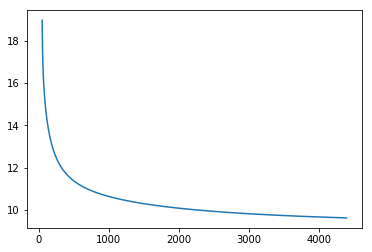

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()